In [1]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tools.feed import data_info
from tools.preprocessing import train_val_test_split, build_features

DATASET_PATH = os.path.join(os.path.dirname('.'), 'datasets', 'diamonds', 'diamonds.csv')

# Challenge 1: Regression model

In [2]:
# DATA FEED
df = pd.read_csv(DATASET_PATH)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [3]:
# EXPLORATORY DATA ANALYSIS
data_info(df, sorted=True)

,index,columna,NaNs,pct_nan,dtype,count,count_unique,pct_unique
0,6,price,0,0.0,int64,5000,3179,63.58
1,5,table,0,0.0,float64,5000,78,1.56
2,4,depth,0,0.0,float64,5000,121,2.42
3,0,carat,0,0.0,float64,5000,202,4.04
4,9,z,0,0.0,float64,5000,304,6.08
5,8,y,0,0.0,float64,5000,471,9.42
6,7,x,0,0.0,float64,5000,474,9.48
7,1,cut,0,0.0,object,5000,5,0.10
8,2,color,0,0.0,object,5000,7,0.14
9,3,clarity,0,0.0,object,5000,8,0.16


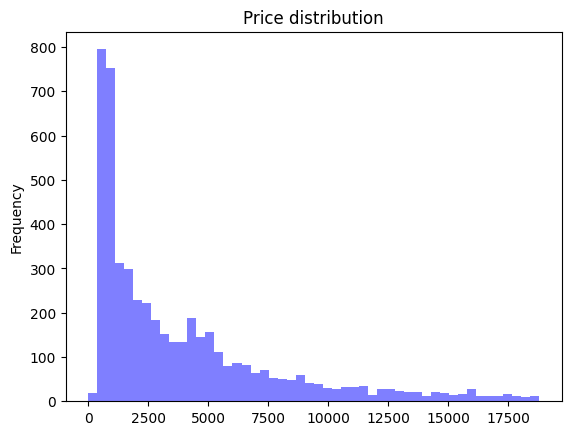

In [4]:
df.price.plot.hist(bins=50, alpha=0.5, color='b', title='Price distribution');

In [5]:
# DATA PREPROCESSING
X = df.drop(columns=["price"])
y = df[["price"]]

# COLUMNS CATEGORIZATION
numerical_features = X.select_dtypes(include='number').columns
categories_count = (X.loc[:, (X.dtypes == "object").values]
        .apply(lambda x: x.to_frame().drop_duplicates().value_counts(), axis=0)
        .sum())

binary_features = categories_count[categories_count == 2].index.to_list()
categorical_features = categories_count[categories_count > 2].index.to_list()

# SPLITTING DATA: Train | Validation | Test
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, verbose=True)

DATA SPLIT INFORMATION:        
Total rows: 5000 - columns: 9        
Training rows: 3200        
Validation rows: 800        
Testing rows: 1000        


In [6]:
# FEATURE ENGINEERING
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(X_train[categorical_features]);

In [7]:
X_train = pd.concat(
    [
        X_train.drop(columns=categorical_features).reset_index(),
        build_features(one_hot_encoder, X_train, categorical_features)
    ], axis=1).set_index('index')

X_val = pd.concat(
    [
        X_val.drop(columns=categorical_features).reset_index(),
        build_features(one_hot_encoder, X_val, categorical_features)
    ], axis=1).set_index('index')

X_test = pd.concat(
    [
        X_test.drop(columns=categorical_features).reset_index(),
        build_features(one_hot_encoder, X_test, categorical_features)
    ], axis=1).set_index('index')

In [8]:
X_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
index,,,,,,,,,,,,,,,,,,,,,
2686,1.00,62.7,59.0,6.37,6.30,3.97,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
985,0.50,61.8,59.0,5.07,5.02,3.12,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3296,0.41,61.6,58.0,4.78,4.74,2.93,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1326,0.73,61.4,56.0,5.78,5.81,3.56,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015,0.42,59.2,61.0,4.88,4.91,2.90,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# MODELING: LightGBM | DNN | XGBoost

# MODEL EVALUATION: RMSE | MAE | R2

# Challenge 2: Automated pipeline

# Challenge 3: Rest API

# Challenge 4: Architecture explanation

The next step is exposing the model to other businesses, but this calls for an upgrade in the training and serving infrastructure. Using your favorite cloud provider, either AWS, GCP, or Azure, design cloud-based training and serving pipelines. You should not implement the solution, but you should provide a detailed explanation of the architecture and the services you would use, motivating your choices.